In [982]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
!pip install bioinfokit
import bioinfokit as bio
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [983]:

mac=pd.read_csv("car+data.csv")
mac.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [984]:

mac.shape

(301, 9)

In [985]:
mac.columns.values

array(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], dtype=object)

In [986]:

mac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [987]:

mac.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [988]:
mac.isna().sum()
mac.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [989]:

print(mac.iloc[:, [0, 1, 3, 5, 7, 8]].describe())

              Year  Present_Price       Owner
count   301.000000     301.000000  301.000000
mean   2013.627907       7.628472    0.043189
std       2.891554       8.644115    0.247915
min    2003.000000       0.320000    0.000000
25%    2012.000000       1.200000    0.000000
50%    2014.000000       6.400000    0.000000
75%    2016.000000       9.900000    0.000000
max    2018.000000      92.600000    3.000000


In [990]:

mac['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [991]:

mac["Car_Name"]= mac["Car_Name"].replace({'Yes':1, 'No':0})
mac["Year"] = mac["Year"].replace({'Yes':1, 'No':0})
mac["Selling_Price"] = mac["Selling_Price"].replace({'Yes':1, 'No':0})
mac["Present_Price"] = mac["Present_Price"].replace({'Yes':1, 'No':0})
mac["Kms_Driven"] = mac["Kms_Driven"].replace({'Yes':1, 'No':0})
mac["Fuel_Type"] = mac["Fuel_Type"].replace({'Yes':1, 'No':0})
mac["Seller_Type"] = mac["Seller_Type"].replace({'Yes':1, 'No':0})
mac["	Transmission"] = mac["Transmission"].replace({'Yes':1, 'No':0})
mac["Owner"] = mac["Owner"].replace({'Yes':1, 'No':0})


In [992]:
mac.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,\tTransmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Manual


In [993]:
maac=mac.iloc[:,1:5]
maac.head()


,Year,Selling_Price,Present_Price,Kms_Driven
0,2014,3.35,5.59,27000
1,2013,4.75,9.54,43000
2,2017,7.25,9.85,6900
3,2011,2.85,4.15,5200
4,2014,4.60,6.87,42450


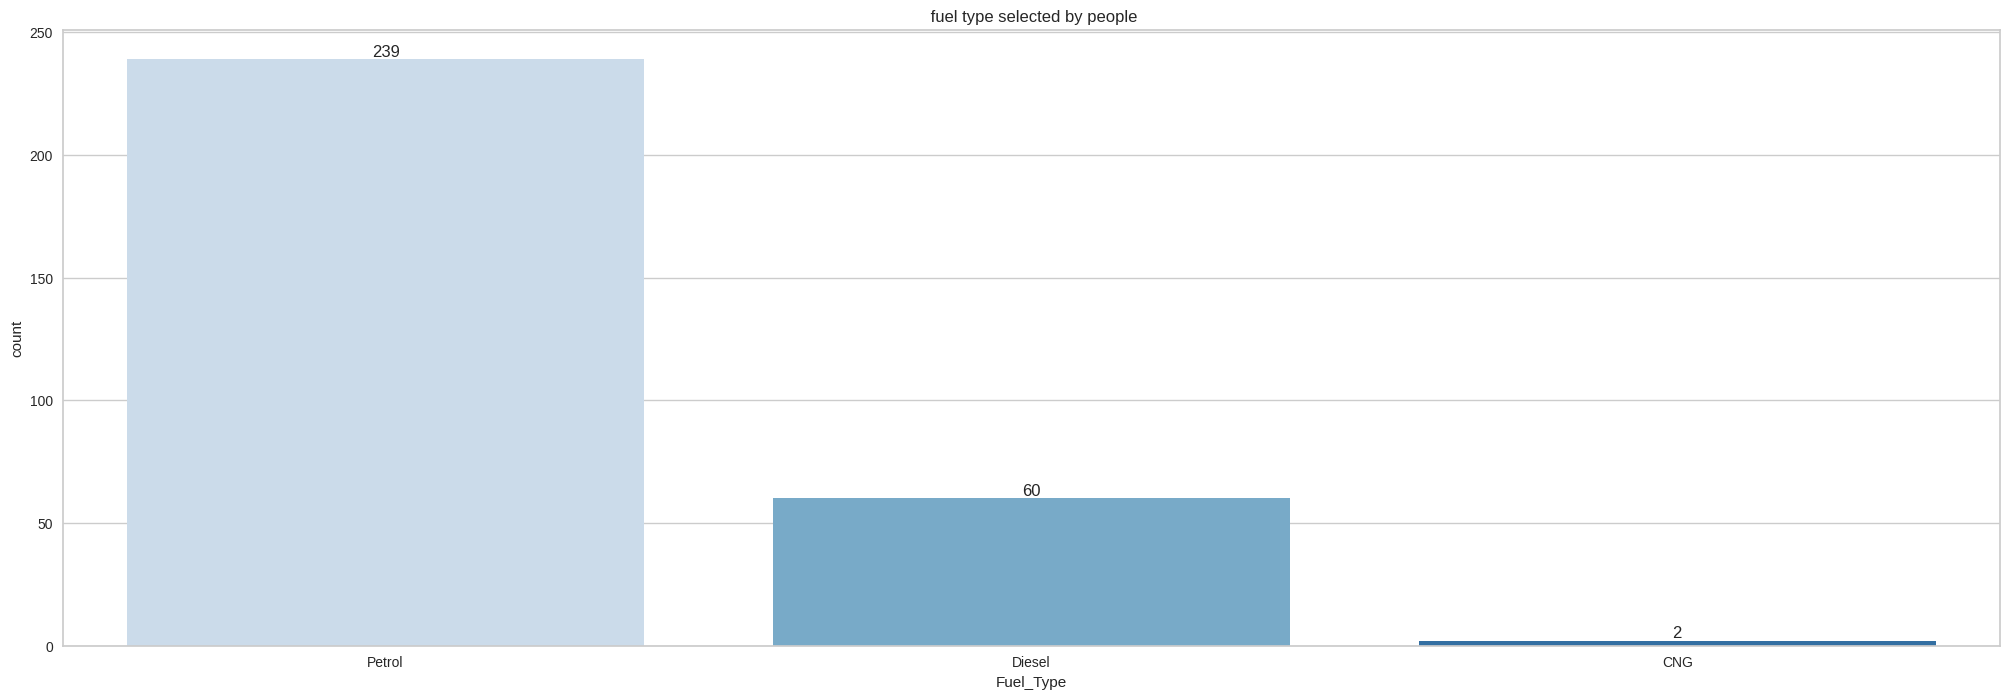

In [994]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=mac['Fuel_Type'],palette = 'Blues')
f.bar_label(f.containers[0])
plt.title(' fuel type selected by people')
plt.show()

In [995]:
from sklearn.preprocessing import LabelEncoder
def label(x):
    mac[x] = LabelEncoder().fit_transform(mac[x])
    return mac

category = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',]

for i in category:
    label(i)
mac

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,\tTransmission
0,90,11,59,57,86,2,0,Manual,0,Manual
1,93,10,78,104,135,1,0,Manual,0,Manual
2,68,14,112,106,26,2,0,Manual,0,Manual
3,96,8,52,49,18,2,0,Manual,0,Manual
4,92,11,76,73,134,1,0,Manual,0,Manual
...,...,...,...,...,...,...,...,...,...,...
296,69,13,129,115,103,1,0,Manual,0,Manual
297,66,12,70,62,172,2,0,Manual,0,Manual
298,69,6,59,114,193,2,0,Manual,0,Manual
299,69,14,137,120,31,1,0,Manual,0,Manual


In [996]:

mcd = mac.loc[:,category]
mcd


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
0,90,11,59,57,86,2,0
1,93,10,78,104,135,1,0
2,68,14,112,106,26,2,0
3,96,8,52,49,18,2,0
4,92,11,76,73,134,1,0
...,...,...,...,...,...,...,...
296,69,13,129,115,103,1,0
297,66,12,70,62,172,2,0
298,69,6,59,114,193,2,0
299,69,14,137,120,31,1,0


In [997]:
x = mac.loc[:,category].values
print(x)

[[ 90  11  59 ...  86   2   0]
 [ 93  10  78 ... 135   1   0]
 [ 68  14 112 ...  26   2   0]
 ...
 [ 69   6  59 ... 193   2   0]
 [ 69  14 137 ...  31   1   0]
 [ 66  13  88 ...  20   2   0]]


In [998]:
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=6)
pc = pca.fit_transform(x)
names = ['A','B','C','D','E','F',]
pf = pd.DataFrame(data = pc, columns = names)
pf

,A,B,C,D,E,F
0,-11.414658,-7.319632,-30.897127,-0.403895,-0.137823,-0.187509
1,55.032629,6.255380,-16.990439,13.239595,-1.586287,0.728099
2,1.032791,-93.809107,9.440324,5.957179,-0.363556,-0.272781
3,-58.474763,-55.541840,-42.501264,9.047253,4.097277,0.026897
4,35.360871,16.482927,-23.901988,-7.445039,-0.700425,0.625841
...,...,...,...,...,...,...
296,60.863074,-44.754756,16.823644,-10.194551,-0.055702,0.449158
297,41.870657,56.755203,-1.450404,-17.813077,-2.086592,-0.502191
298,79.757391,62.027597,6.918997,24.333472,-0.921639,-0.254022
299,24.618894,-107.111936,16.734982,-1.755312,0.776173,0.584817


In [999]:
pca.explained_variance_ratio_

array([6.09887999e-01, 3.35786466e-01, 3.80576132e-02, 1.58593651e-02,
       3.85902667e-04, 1.63969398e-05])

In [1000]:
np.cumsum(pca.explained_variance_ratio_)

array([0.609888  , 0.94567446, 0.98373208, 0.99959144, 0.99997735,
       0.99999374])

In [1001]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = [chr(i) for i in range(ord('A'),ord('K')+1)]
loadings_mac = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_mac['variable'] = mcd.columns.values
loadings_mac = loadings_mac.set_index('variable')
loadings_mac


,A,B,C,D,E,F
variable,,,,,,
Car_Name,0.266294,-0.148178,-0.951542,0.039466,-0.006692,0.001773
Year,-0.008910,-0.038115,0.006109,-0.103288,-0.993838,-0.006366
Selling_Price,0.491270,-0.504862,0.187372,-0.679022,0.086707,-0.006565
Present_Price,0.574718,-0.319195,0.240504,0.711117,-0.065360,0.003539
Kms_Driven,0.597764,0.787281,0.038837,-0.144710,-0.020262,-0.002456
Fuel_Type,-0.003180,0.000781,-0.000652,0.008511,0.004909,-0.982686
Seller_Type,-0.005373,0.002901,0.008430,0.001656,-0.004000,0.184995


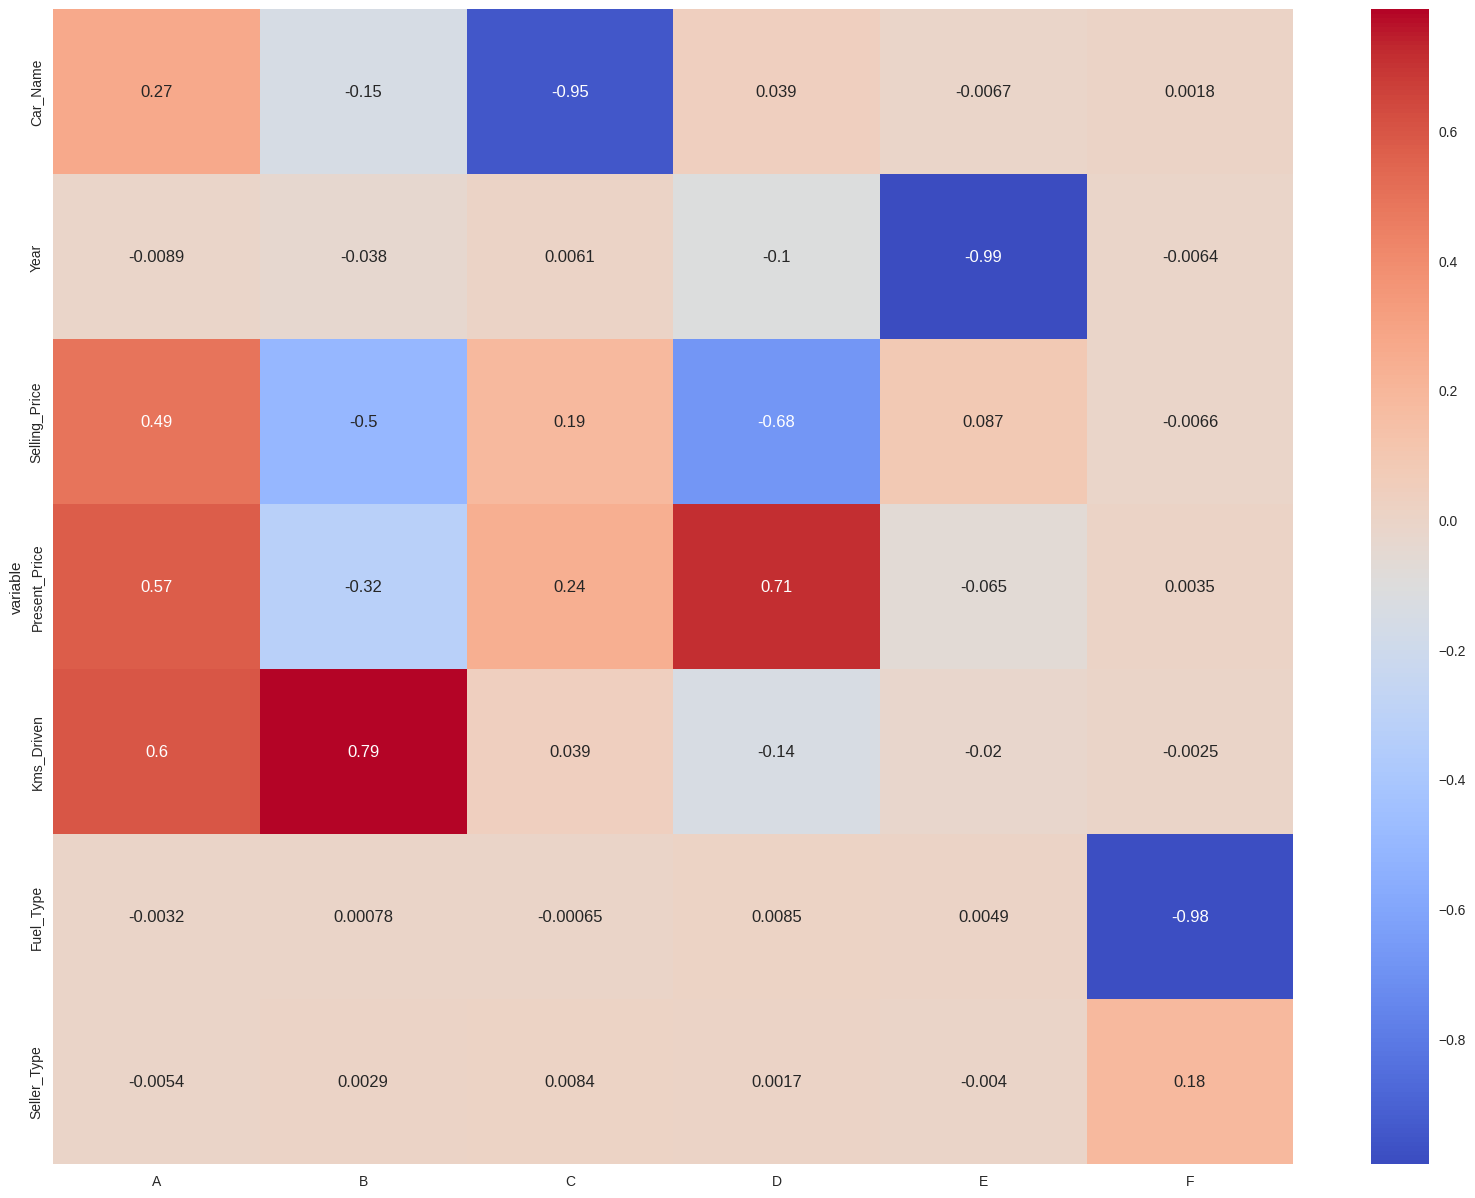

In [1002]:

plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_mac, annot=True, cmap='coolwarm')
plt.show()

In [1003]:

std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))

print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([68.34646715, 50.71338747, 17.07307708, 11.02132794,  1.71921391,
        0.35438263])

In [1004]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.609888  , 0.94567446, 0.98373208, 0.99959144, 0.99997735,
       0.99999374])

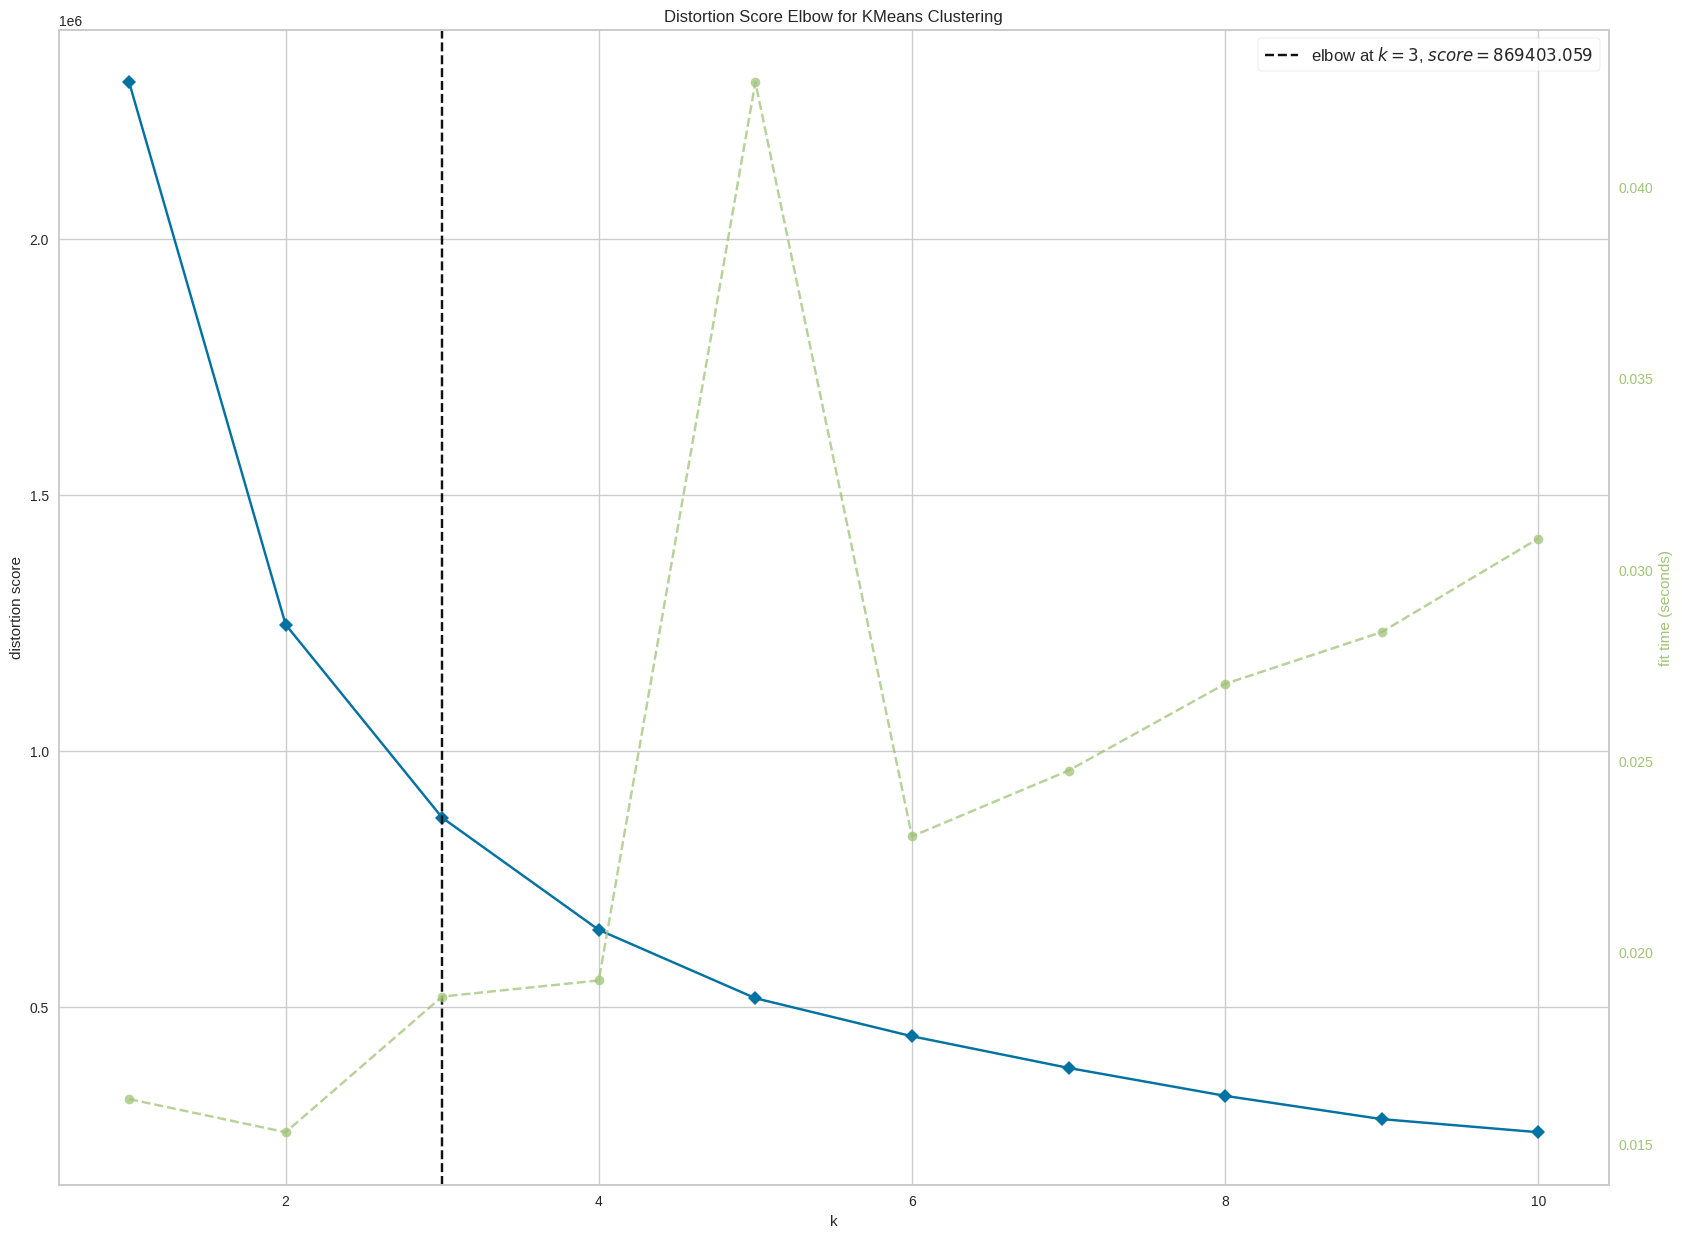

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1005]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11)).fit(mcd)
visualizer.show()

In [1006]:

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(mcd)
mac['cluster_num'] = kmeans.labels_
print ("kmeans.labels_",kmeans.labels_)
print ("kmeans.inertia_",kmeans.inertia_)
print("kmeans.n_iter_",kmeans.n_iter_)

kmeans.labels_ [2 1 2 0 1 2 2 2 2 1 0 1 2 2 1 1 1 1 1 1 0 2 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1
 1 0 1 2 1 1 1 1 2 1 1 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1
 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 2 1 0 2 2 1 2 2 1 1 2 1 2 1 0 0 1 1 1 2
 1 1 1 0 2 1 1 1 1 2 2 1 2 2 0 1 1 0 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 1 2
 1 2 2 1 2 1 2 1 2 2 2 1 1 2 1 2 2 2 2 2 1 2 1 1 2 0 2 2 1 2 2 2 2 2 1 1 1
 2 1 1 2 2]
kmeans.inertia_ 869335.8315350476
kmeans.n_iter_ 10


In [1007]:
print("kmeans.cluster_centers_",kmeans.cluster_centers_)

kmeans.cluster_centers_ [[3.72685185e+01 1.09259259e+01 2.34722222e+01 2.31203704e+01
  6.14814815e+01 2.00000000e+00 8.88888889e-01]
 [7.61735537e+01 9.14876033e+00 7.78512397e+01 9.19008264e+01
  1.54561983e+02 1.61983471e+00 7.43801653e-02]
 [7.76666667e+01 1.26666667e+01 1.11708333e+02 9.90555556e+01
  6.49305556e+01 1.75000000e+00 1.38888889e-02]]


In [1008]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 72, 1: 121, 0: 108})

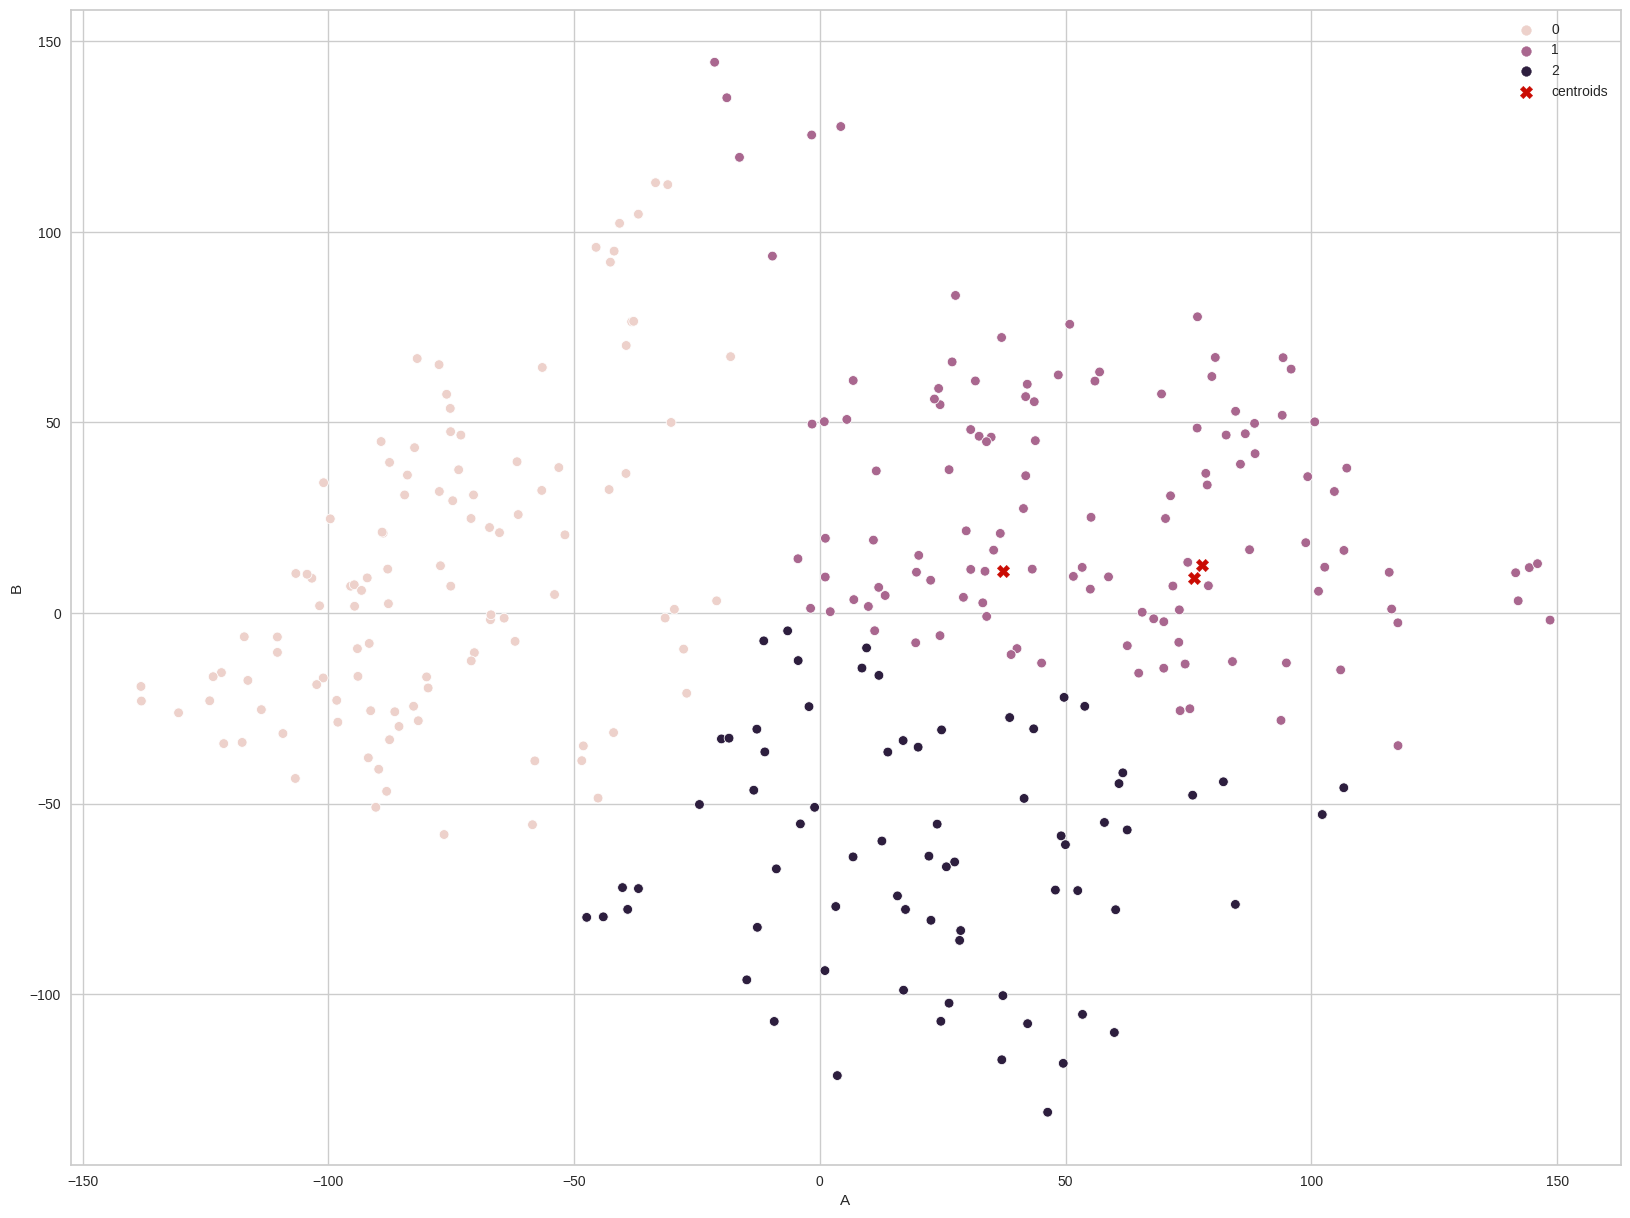

In [1009]:
sns.scatterplot(data=pf, x="A", y="B", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [1010]:
mcd_data2=pd.get_dummies(mac, prefix=['cluster_num'], columns=['cluster_num'])
mcd_data2.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,\tTransmission,cluster_num_0,cluster_num_1,cluster_num_2
0,90,11,59,57,86,2,0,Manual,0,Manual,0,0,1
1,93,10,78,104,135,1,0,Manual,0,Manual,0,1,0
2,68,14,112,106,26,2,0,Manual,0,Manual,0,0,1
3,96,8,52,49,18,2,0,Manual,0,Manual,1,0,0


In [1011]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(mac['cluster_num'],mac['Fuel_Type'])
#crosstab = crosstab[['0','+1','+2','+3','+4','+5']]
crosstab

Fuel_Type,0,1,2
cluster_num,,,
0,0,0,108
1,2,42,77
2,0,18,54


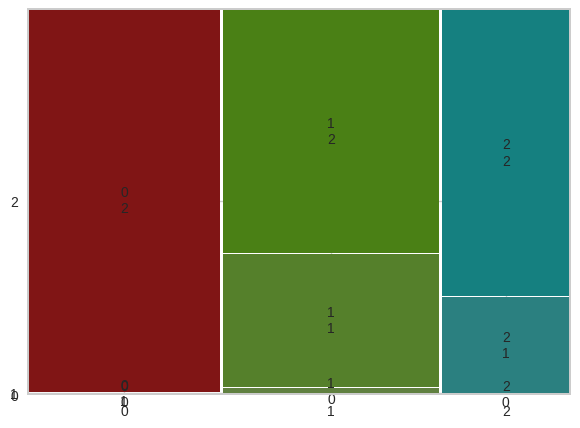

In [1012]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()


In [1013]:
crosstab_gender =pd.crosstab(mac['cluster_num'],mac['Fuel_Type'].replace({2: 'Petrol', 1: 'Diesel', 0 :'CNG'}))
crosstab_gender

Fuel_Type,CNG,Diesel,Petrol
cluster_num,,,
0,0,0,108
1,2,42,77
2,0,18,54


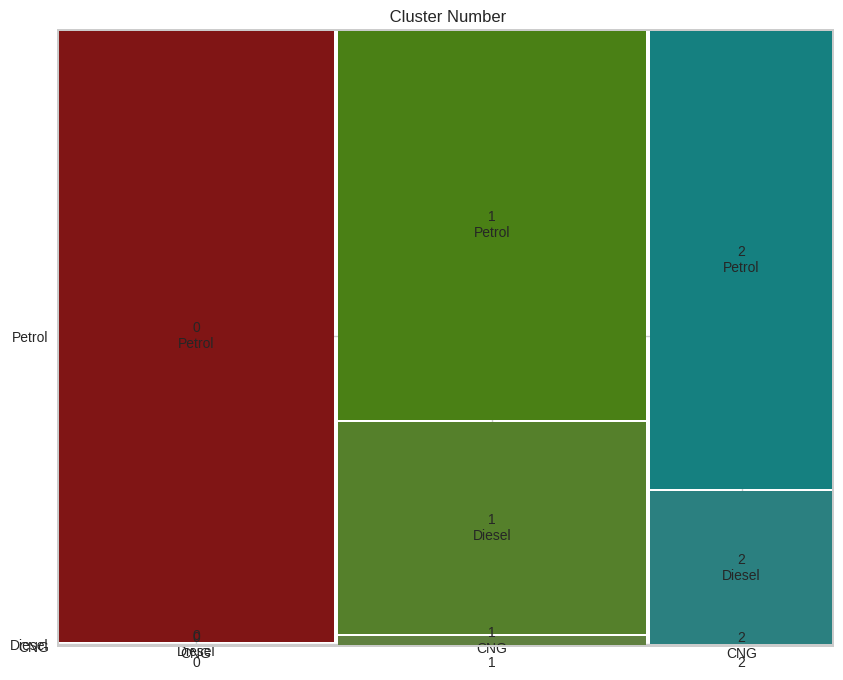

In [1014]:

plt.rcParams['figure.figsize'] = (7,5)
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(crosstab_gender.stack(), ax=ax, title=' Cluster Number')
plt.show()

In [1015]:
mac['Selling_Price'] = LabelEncoder().fit_transform(mac['Selling_Price'])
visit = mac.groupby('cluster_num')['Selling_Price'].mean()
visit = visit.to_frame().reset_index()
visit


,cluster_num,Selling_Price
0,0,23.472222
1,1,77.851240
2,2,111.708333


In [1016]:
mac['Fuel_Type'] = LabelEncoder().fit_transform(mac['Fuel_Type'])
Like = mac.groupby('cluster_num')['Fuel_Type'].mean()
Like = Like.to_frame().reset_index()
Like


,cluster_num,Fuel_Type
0,0,2.000000
1,1,1.619835
2,2,1.750000


In [1017]:
mac['Fuel_Type'] = LabelEncoder().fit_transform(mac['Fuel_Type'])
Fuel_Type = mac.groupby('cluster_num')['Fuel_Type'].mean()
Fuel_Type = Fuel_Type.to_frame().reset_index()
Fuel_Type

,cluster_num,Fuel_Type
0,0,2.000000
1,1,1.619835
2,2,1.750000


In [1018]:

segment = Fuel_Type.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment


,cluster_num,Fuel_Type_x,Fuel_Type_y,Selling_Price
0,0,2.000000,2.000000,23.472222
1,1,1.619835,1.619835,77.851240
2,2,1.750000,1.750000,111.708333


In [1019]:
import pandas as pd

scaled_mac = scalar.fit_transform(maac)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_mac)
pca_mac = pd.DataFrame(data=principal_components ,columns=["A","B",])
pca_mac.head()



,A,B
0,-0.374342,-0.244701
1,0.176445,0.274396
2,0.495828,-1.417451
3,-0.704112,0.112440
4,-0.041734,0.000855


<Axes: xlabel='A', ylabel='B'>

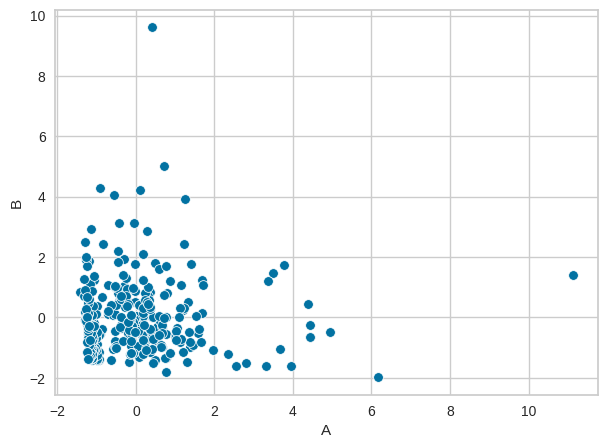

In [1020]:
sns.scatterplot(data=pca_mac, x="A", y="B")

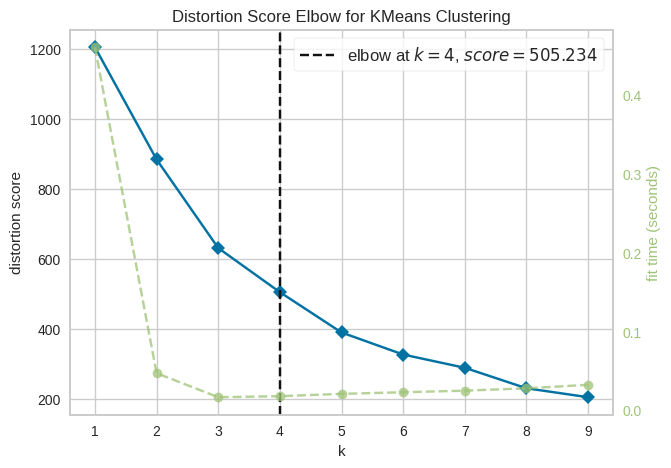

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1021]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_mac)
visualizer.show()

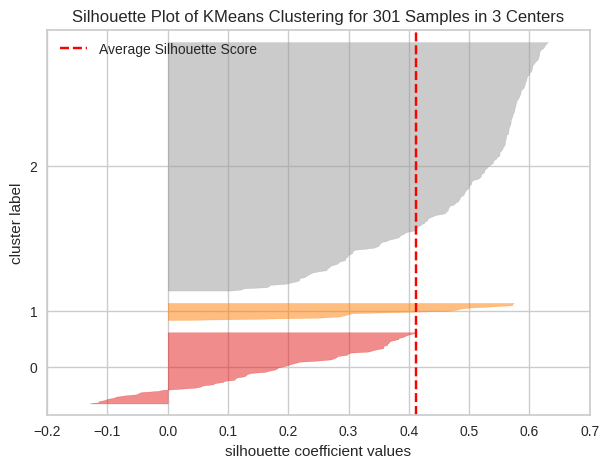

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 301 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [1022]:

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(scaled_mac)
visualizer.show()

In [1023]:

kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_mac)
pca_mac_kmeans= pd.concat([pca_mac,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_mac_kmeans.head()

,A,B,cluster
0,-0.374342,-0.244701,1
1,0.176445,0.274396,1
2,0.495828,-1.417451,1
3,-0.704112,0.112440,1
4,-0.041734,0.000855,1


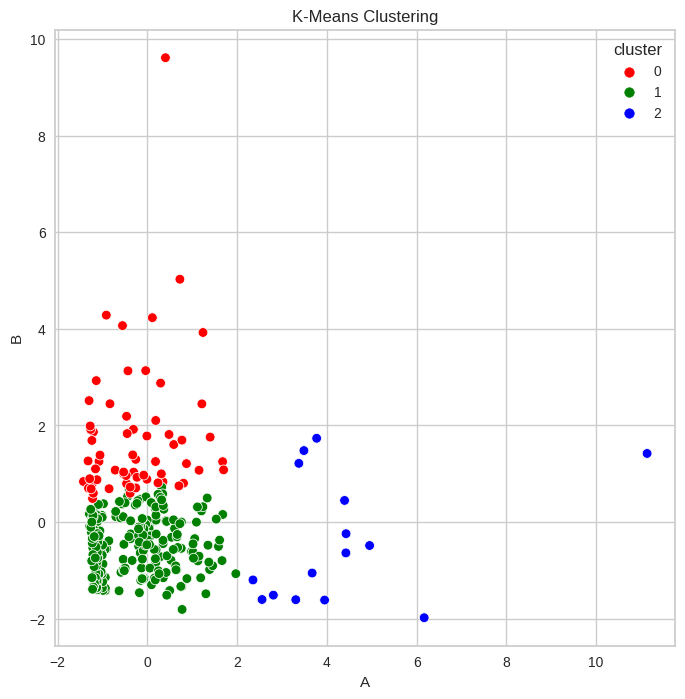

In [1024]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="A",y="B",hue="cluster",data=pca_mac_kmeans,palette=['red','green','blue'])
plt.title("K-Means Clustering")
plt.show()

In [1025]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_mac)
pca_mac_kmeans1= pd.concat([mac1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_mac_kmeans1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,cluster
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,2
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,2
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,2
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,2


<Axes: xlabel='cluster', ylabel='count'>

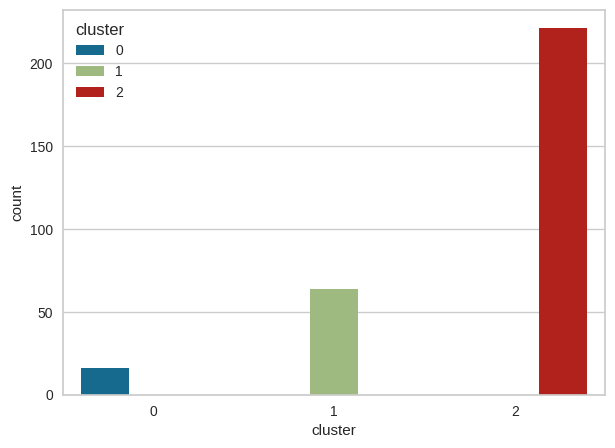

In [1026]:
sns.countplot(x ='cluster', data = pca_mac_kmeans1,hue = "cluster")

In [1027]:
cluster_1_mac = pca_mac_kmeans1[pca_mac_kmeans1["cluster"]==0]
cluster_1_mac.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,cluster
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,0
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,0


In [1028]:
cluster_2_mac = pca_mac_kmeans1[pca_mac_kmeans1["cluster"]==1]
cluster_2_mac.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,cluster
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,1
19,sx4,2010,2.65,7.98,41442,Petrol,Dealer,1
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,1
28,alto k10,2010,1.95,3.95,44542,Petrol,Dealer,1
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,1


In [1029]:

cluster_3_mac = pca_mac_kmeans1[pca_mac_kmeans1["cluster"]==2]
cluster_3_mac.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,cluster
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,2
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,2
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,2
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,2


In [1030]:

mac_new= pd.concat([mac,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
mac_new.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,\tTransmission,cluster_num,cluster
0,90,11,59,57,86,2,0,Manual,0,Manual,2,2
1,93,10,78,104,135,1,0,Manual,0,Manual,1,2
2,68,14,112,106,26,2,0,Manual,0,Manual,2,2
3,96,8,52,49,18,2,0,Manual,0,Manual,0,2
4,92,11,76,73,134,1,0,Manual,0,Manual,1,2


In [1031]:

mac_new['Selling_Price'].value_counts()

15     8
21     8
87     7
75     7
6      6
      ..
67     1
60     1
96     1
155    1
137    1
Name: Selling_Price, Length: 156, dtype: int64

In [1032]:
mac_new["Selling_Price"]= mac_new["Selling_Price"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
mac_new['Selling_Price'].value_counts()

15     8
21     8
87     7
75     7
6      6
      ..
67     1
60     1
96     1
155    1
137    1
Name: Selling_Price, Length: 156, dtype: int64

In [1033]:

mac_new['Present_Price'].value_counts()

103    15
123    13
58      8
51      7
32      7
       ..
132     1
80      1
130     1
111     1
120     1
Name: Present_Price, Length: 147, dtype: int64

In [1034]:
mac_new["Present_Price"]= mac_new["Present_Price"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
mac_new["Selling_Price"]= mac_new["Selling_Price"].replace({'CNG':0, 'Petrol':1 ,'Diesel':2})
mac_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,\tTransmission,cluster_num,cluster
0,90,11,59,57,86,2,0,Manual,0,Manual,2,2
1,93,10,78,104,135,1,0,Manual,0,Manual,1,2
2,68,14,112,106,26,2,0,Manual,0,Manual,2,2
3,96,8,52,49,18,2,0,Manual,0,Manual,0,2
4,92,11,76,73,134,1,0,Manual,0,Manual,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
296,69,13,129,115,103,1,0,Manual,0,Manual,2,2
297,66,12,70,62,172,2,0,Manual,0,Manual,1,2
298,69,6,59,114,193,2,0,Manual,0,Manual,1,1
299,69,14,137,120,31,1,0,Manual,0,Manual,2,2


In [1035]:
X = mac_new.drop(['cluster'],axis=1)
y= mac_new[['Present_Price']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)
X_test.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,\tTransmission,cluster_num
293,69,7,58,107,116,2,0,Manual,0,Manual,1
123,46,10,29,32,143,2,1,Manual,0,Manual,0
22,93,8,74,91,151,2,0,Automatic,0,Automatic,1
244,94,10,97,103,148,1,0,Manual,0,Manual,1
268,66,14,79,60,63,2,0,Manual,0,Manual,2


In [1036]:
y_test.head(5)

,Present_Price
293,107
123,32
22,91
244,103
268,60
